gen	evals	std    	min    	avg    	max    
0  	200  	190.374	201.779	579.094	1117.92
1  	200  	209.67 	159.798	569.156	1664.67
2  	200  	237.868	217.328	633.22 	1729.64
3  	200  	167.974	149.228	465.668	1025.1 
4  	200  	128.221	162.233	377.383	885.549
5  	200  	96.0647	119.326	309.076	638.257
6  	200  	71.6795	97.3791	239.775	473.158
7  	200  	46.5967	89.547 	197.3  	394.125
8  	200  	38.8979	70.5624	162.672	277.432
9  	200  	28.8737	68.5487	144.335	248.717
10 	200  	28.7762	61.7308	131.918	219.709
11 	200  	29.9991	68.6083	133.541	247.375
12 	200  	26.0387	64.53  	127.332	216.255
13 	200  	22.4113	44.0157	119.268	175.604
14 	200  	25.9541	49.4129	119.626	183.685
15 	200  	23.95  	59.013 	117.218	230.224
16 	200  	24.1294	61.6525	115.68 	184.112
17 	200  	21.2215	47.7973	112.197	173.04 
18 	200  	21.3992	59.8275	110.516	171.494
19 	200  	22.5629	58.6994	110.958	172.02 
20 	200  	23.045 	42.1719	106.422	165.469
21 	200  	20.5435	53.01  	105.564	157.406
22 	200  	21.642 	49.5953	107.798	

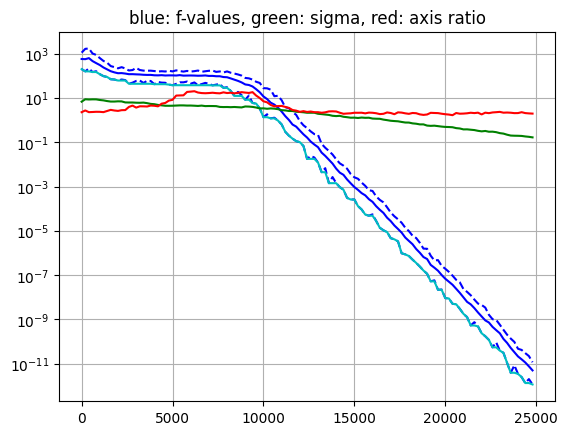

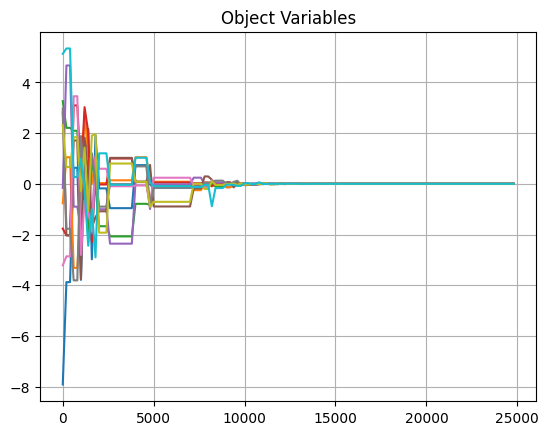

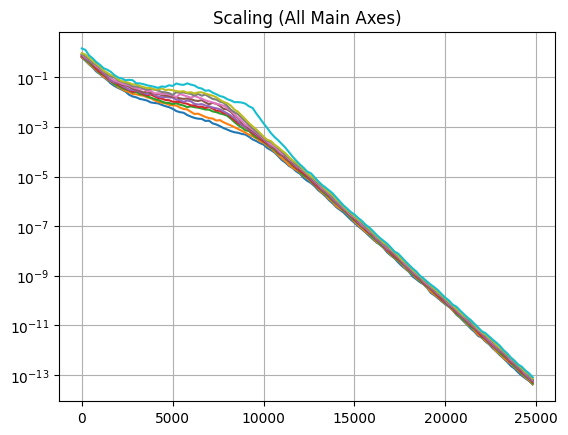

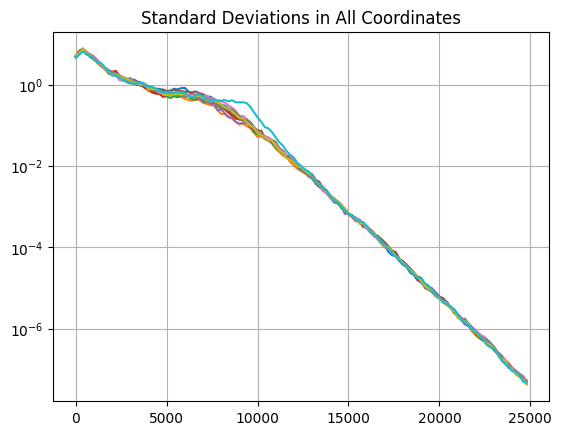

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
from deap import algorithms, base, benchmarks, cma, creator, tools 

np.random.seed(0) 
num_individuals = 10 
num_generations = 125 

strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=5.0, 
                        lambda_=20*num_individuals) 

creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) 
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox() 
toolbox.register("evaluate", benchmarks.rastrigin) 
toolbox.register("generate", strategy.generate, creator.Individual) 
toolbox.register("update", strategy.update) 

hall_of_fame = tools.HallOfFame(1) 

stats = tools.Statistics(lambda x: x.fitness.values) 
stats.register("avg", np.mean) 
stats.register("std", np.std) 
stats.register("min", np.min) 
stats.register("max", np.max) 
logbook = tools.Logbook() 
logbook.header = "gen", "evals", "std", "min", "avg", "max" 

sigma = np.ndarray((num_generations, 1)) 
axis_ratio = np.ndarray((num_generations, 1)) 
diagD = np.ndarray((num_generations, num_individuals)) 
fbest = np.ndarray((num_generations,1)) 
best = np.ndarray((num_generations, num_individuals)) 
std = np.ndarray((num_generations, num_individuals)) 

for gen in range(num_generations): 
    population = toolbox.generate()
    fitnesses = toolbox.map(toolbox.evaluate, population) 
    for ind, fit in zip(population, fitnesses): 
        ind.fitness.values = fit 
    toolbox.update(population) 

    hall_of_fame.update(population) 
    record = stats.compile(population) 
    logbook.record(evals=len(population), gen=gen, **record) 
    
    print(logbook.stream) 

    sigma[gen] = strategy.sigma 
    axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2 
    diagD[gen, :num_individuals] = strategy.diagD**2 
    fbest[gen] = hall_of_fame[0].fitness.values 
    best[gen, :num_individuals] = hall_of_fame[0] 
    std[gen, :num_individuals] = np.std(population, axis=0) 

x = list(range(0, strategy.lambda_ * num_generations, strategy.lambda_)) 
avg, max_, min_ = logbook.select("avg", "max", "min") 
plt.figure() 
plt.semilogy(x, avg, "-b") 
plt.semilogy(x, max_, "--b") 
plt.semilogy(x, min_, "--b") 
plt.semilogy(x, fbest, "-c") 
plt.semilogy(x, sigma, "-g") 
plt.semilogy(x, axis_ratio, "-r") 
plt.grid(True) 
plt.title("blue: f-values, green: sigma, red: axis ratio") 

plt.figure() 
plt.plot(x, best) 
plt.grid(True) 
plt.title("Object Variables") 

plt.figure() 
plt.semilogy(x, diagD) 
plt.grid(True) 
plt.title("Scaling (All Main Axes)") 

plt.figure() 
plt.semilogy(x, std) 
plt.grid(True) 
plt.title("Standard Deviations in All Coordinates") 

plt.show() 